# 🧠 Prédiction de la maladie d'Alzheimer 🧠

## Introduction

Malgré les 50 millions de personnes déjà affectées par la maladie d’Alzheimer (MA) dans le monde, l’OMS estime que ce chiffre sera triplé d’ici 2050. La MA est la cause la plus fréquente de démence et représenterait 60 à 80 % des cas de démence (Porsteinsson et al, 2021). Elle touche principalement les personnes âgées et caractérisée par un déclin cognitif progressif. 

La maladie d'Alzheimer (MA) est principalement associée à des troubles de la mémoire chez les personnes âgées (Aziz et al., 2017). Sur le plan histopathologique, elle est caractérisée par deux types de lésions : l'agrégation extracellulaire des fragments de peptides β-amyloïdes (Aβ) formant des plaques amyloïdes et les dégénérescences neurofibrillaires (DNFs), qui sont des dépôts intracellulaires de protéines tau hyperphosphorylées (He et al., 2020). Ces anomalies provoquent une inflammation accrue et une atrophie corticale, entraînant un déclin cognitif progressif. La progression de la maladie est généralement lente, avec les premiers signes apparaissant le plus souvent autour de 65 ans.

Une détection précoce et précise est essentielle pour une prise en charge efficace et de meilleurs résultats pour les patients (Atri A., 2019). Les méthodes de diagnostic traditionnelles, telles que la neuro-imagerie et l'analyse du liquide céphalo-rachidien, sont souvent invasives, coûteuses et longues. Les progrès de l'intelligence artificielle (IA) et de l'apprentissage machine (ML) offrent des alternatives prometteuses qui sont non invasives, efficaces et rentables.

## Le jeu de données

Cet ensemble de données contient des informations complètes sur la santé de 2 149 patients, chacun identifié de manière unique par des numéros d'identification allant de 4751 à 6900. L'ensemble de données comprend des détails démographiques, des facteurs liés au mode de vie, des antécédents médicaux, des mesures cliniques, des évaluations cognitives et fonctionnelles, des symptômes et un diagnostic de la maladie d'Alzheimer. Les données sont idéales pour les chercheurs et les data scientists qui cherchent à explorer les facteurs associés à la maladie d'Alzheimer, à développer des modèles prédictifs et à effectuer des analyses statistiques. 

## Table des matières

1. [Importation des librairies](#i-importation-des-librairies)
2. [Inspection des données](#ii-inspection-des-données)
3. [Analyse exploratoire des données](#iii-analyse-exploratoire-des-données)
    - [Variable 'Diagnosis' (Target)](#31-variable-diagnosis-target)
    - [Variables numériques continues](#32-variables-numériques-continues)
        - [Détection des outliers](#321-détection-des-outliers)
        - [Normalité des données](#322-normalité-des-données)
        - [Distribution des variables](#323-distribution-des-variables)
        - [Corrélation entre les variables](#324-corrélation-entre-les-variables)
        - [Distribution en fonction de la variable Diagnosis (Target)](#325-distribution-en-fonction-de-la-variable-diagnosis-target)
    - [Variables catégorielles numériques](#33-variables-catégorielles-numériques)
        - [Distribution des variables](#331-distribution-des-variables)
        - [Distribution en fonction de la variable Diagnosis (Target)](#332-distribution-en-fonction-de-la-variable-diagnosis-target)
4. [Modélisation](#iv-modélisation)
5. [Conclusion](#v-conclusion)


## Citation 

@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}


# I- Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import mlflow
import mlflow.sklearn
from mlflow.models.signature import infer_signature

# II - Inspection des données 

## Definition des variables

#### Informations sur le patient

- **PatientID** : Identifiant unique attribué à chaque patient (4751 à 6900).

#### Données démographiques

- **Age** : l'âge des patients est compris entre 60 et 90 ans.
- **Gender** : Sexe des patients, où 0 représente un homme et 1 une femme.
- **Ethnicity** : L'origine ethnique des patients, codée comme suit :
0 : Caucasien
1 : Afro-américain
2 : Asiatique
3 : Autre
- **EducationLevel** : Le niveau d'éducation des patients, codé comme suit :
0 : Aucun
1 : Lycée
2 : Licence
3 : Supérieur

#### Facteurs liés au mode de vie

- **BMI** : indice de masse corporelle des patients, compris entre 15 et 40.
- **Smocking** : Statut tabagique, où 0 indique Non et 1 indique Oui.
- **AlcoholConsumption** : Consommation hebdomadaire d'alcool en unités, comprise entre 0 et 20.
- **PhysicalActivity** : Activité physique hebdomadaire en heures, de 0 à 10.
- **DietQuality** : Score de qualité du régime alimentaire, allant de 0 à 10.
- **SleepQuality** : Score de qualité du sommeil, allant de 4 à 10.

#### Antécédents médicaux

- **FamilyHistoryAlzheimers** : Antécédents familiaux de maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.
- **CardiovascularDisease** : Présence d'une maladie cardiovasculaire, 0 indiquant Non et 1 indiquant Oui.
- **Diabetes** : Présence de diabète, où 0 indique Non et 1 indique Oui.
- **Depression** : Présence d'une dépression, où 0 indique Non et 1 indique Oui.
- **HeadInjury** : Antécédents de traumatisme crânien, où 0 indique Non et 1 indique Oui.
- **Hypertension** : Présence d'hypertension, où 0 indique Non et 1 indique Oui.

#### Mesures cliniques

- **SystolicBP** : tension artérielle systolique, comprise entre 90 et 180 mmHg.
- **DiastolicBP** : tension artérielle diastolique, comprise entre 60 et 120 mmHg.
- **CholesterolTotal** : taux de cholestérol total, compris entre 150 et 300 mg/dL.
- **CholesterolLDL** : taux de cholestérol des lipoprotéines de basse densité, compris entre 50 et 200 mg/dL.
- **CholesterolHDL** : taux de cholestérol des lipoprotéines de haute densité, compris entre 20 et 100 mg/dL.
- **CholesterolTriglycerides** : Taux de triglycérides, compris entre 50 et 400 mg/dL.

#### Évaluations cognitives et fonctionnelles

- **MMSE** : score du Mini-Mental State Examination, compris entre 0 et 30. Les scores les plus bas indiquent une déficience cognitive.
- **FunctionalAssessment** : Score d'évaluation fonctionnelle, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante.
- **MemoryComplaints** : Présence de troubles de la mémoire, où 0 indique Non et 1 indique Oui.
- **BehavioralProblems** : Présence de problèmes de comportement, 0 indiquant Non et 1 indiquant Oui.
- **ADL** : score des activités de la vie quotidienne, allant de 0 à 10. Les scores les plus bas indiquent une déficience plus importante.

#### Symptômes

- **Confusion** : Présence de confusion, 0 indiquant Non et 1 indiquant Oui.
- **Disorientation** : Présence de désorientation, 0 indiquant Non et 1 indiquant Oui.
- **PersonalityChanges** : Présence de changements de personnalité, 0 indiquant Non et 1 indiquant Oui.
- **DifficultyCompletingTasks** : Présence de difficultés à accomplir des tâches, où 0 indique Non et 1 indique Oui.
- **Forgetfulness** : Présence d'oublis, où 0 indique Non et 1 indique Oui.

#### Informations sur le diagnostic
- **Diagnosis** : Statut du diagnostic de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui.

#### Informations confidentielles

- **DoctorInCharge** : Cette colonne contient des informations confidentielles sur le médecin responsable, avec « XXXConfid » comme valeur pour tous les patients.


In [2]:
#Charger le dataset
df = pd.read_csv('alzheimers_disease_data.csv', sep=',')

#Observation des données
print("Le jeu de données contient " + str(df.shape[0]) + " lignes et " + str(df.shape[1]) + " colonnes")
df.head()

Le jeu de données contient 2149 lignes et 35 colonnes


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation               0.0
Personalit

<Axes: >

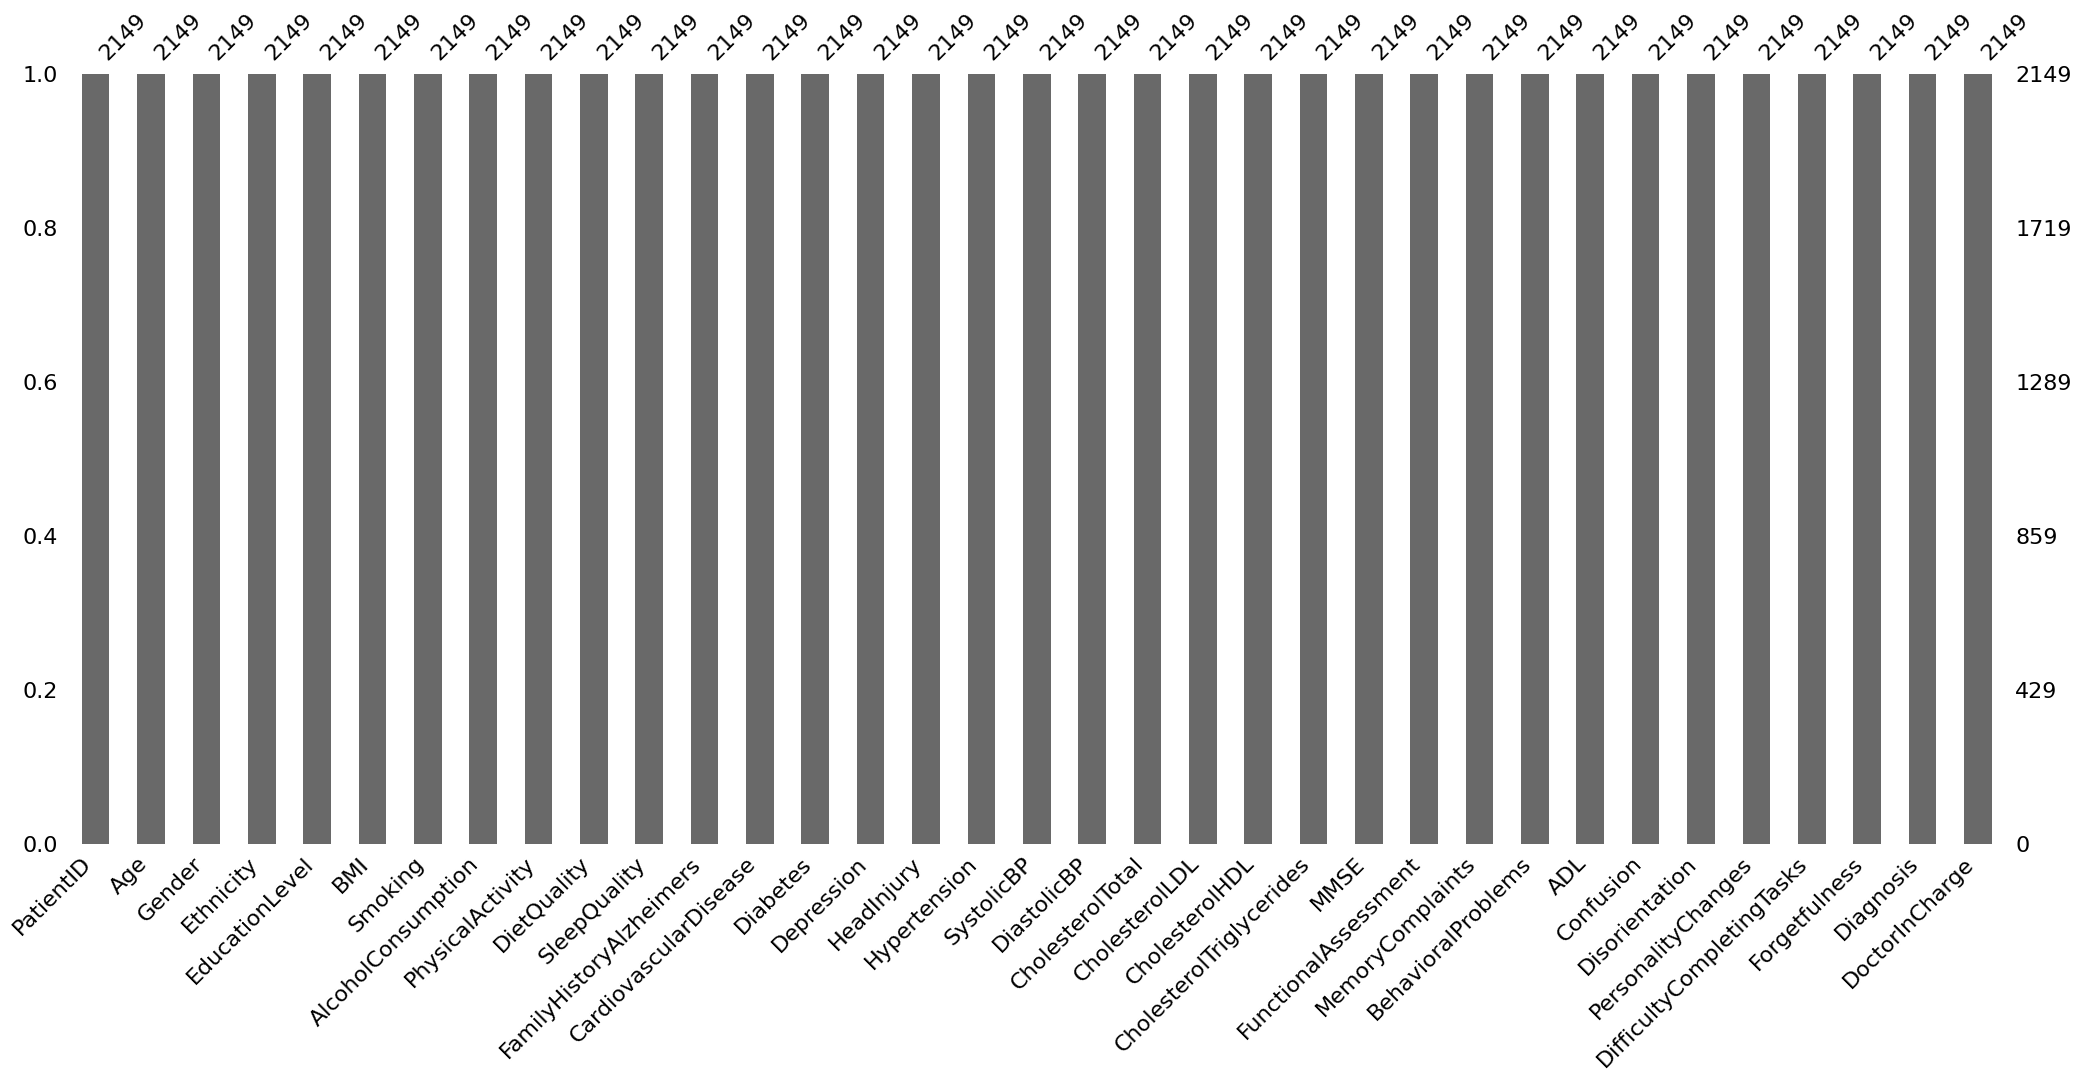

In [4]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
display(df.isna().mean())
msno.bar(df)

In [5]:
#Existe-t-il des doublons ? 
doublon = df['PatientID'].duplicated().sum()
print("Le nombre de doublon dans la colonne 'PatientID' est de : " + str(doublon))

Le nombre de doublon dans la colonne 'PatientID' est de : 0


In [6]:
#Suppression des colonnes inutiles pour la suite 
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

In [7]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Après la suppression des colonnes inutiles pour la suite du projet, le jeu de données se compose de 2149 observations et 33 colonnes.
- Le dataset ne comporte aucune valeur manquante
- Il n'y a pas de doublon dans ce dataset

## III- Analyse exploratoire des données

La maladie d'Alzheimer est influencée par une combinaison complexe de facteurs génétiques, environnementaux et comportementaux. Parmi les principaux facteurs de risque, l'âge avancé, généralement défini comme étant au-delà de 65 ans, est crucial, ainsi que la présence d'au moins un allèle APOE ε4, qui joue un rôle important dans la susceptibilité à la maladie. Le genre joue également un rôle significatif, avec les femmes étant plus susceptibles de développer la maladie, surtout après 80 ans (Scheltens et al., 2021). De plus, des facteurs associés aux maladies cardiovasculaires, tels que l'hypertension, le diabète et l'hypercholestérolémie, ainsi qu'un mode de vie malsain, sont également liés à une augmentation du risque de développer la démence.

Un rapport de *The Lancet* en 2017 a souligné que près d'un tiers des cas de la maladie d'Alzheimer pourraient être attribués à des facteurs de mode de vie, tels que l'alimentation, l'activité physique, le tabagisme, la consommation d'alcool, le niveau d'éducation et les traumatismes crâniens. Ces facteurs modifiables offrent des opportunités pour des interventions préventives potentiellement efficaces.

Les symptômes de la maladie d'Alzheimer évoluent au fil du temps. La maladie débute généralement par des pertes de mémoire qui s'aggravent progressivement, suivies de difficultés croissantes dans la planification et l'exécution des tâches, tant dans les contextes sociaux que professionnels. À mesure que la maladie progresse, les patients peuvent développer des désorientations spatio-temporelles, des troubles de l'expression, ainsi que des changements notables dans l'humeur et la personnalité. Les infections respiratoires deviennent souvent la cause la plus fréquente de décès chez les personnes atteintes d'Alzheimer, bien que la maladie puisse également entraîner divers autres problèmes de santé (Burns et al., 1990).

## 3.1 - Variable 'Diagnosis' (Target)

La variable 'Diagnosis' nous donne des informations sur le diagnostic  de la maladie d'Alzheimer, où 0 indique Non et 1 indique Oui C'est notre target..

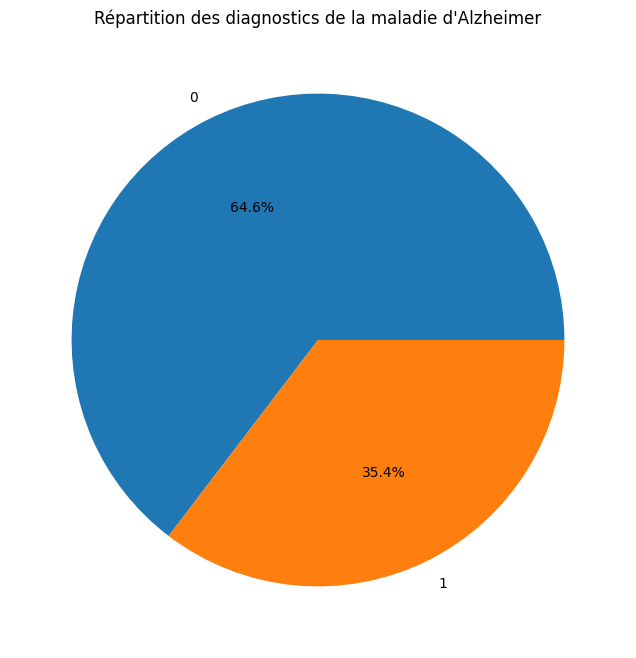

In [8]:
#Compter occurence de chaque catégorie de 'Diagnosis'
diagnosis_counts = df['Diagnosis'].value_counts()

#Représentation graphique
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%')
plt.title('Répartition des diagnostics de la maladie d\'Alzheimer')
plt.show()

- On observe une grande disparité entre les deux groupes. Le nombre de patient diagnostiqué de la maladie d'ALzheimer (1) est de 35.4% contre 64.6% de patient non diagnostiqué (0). Notre target présente donc un **déséquilibre de classe** qui pourrait biaiser nos modèles prédictifs. Nous devrons prendre en compte cette information et ajuster les poids des classes en fonction de leur proportion dans les données afin de refléter ce déséquilibre.

## 3.2 - Variables numériques continues 

On sélectionne les variables numériques continues pour étudier leur distribution et leur corrélation.
Pour sélectionner les variables numériques continues, on considère que toutes les variables ayant un nombre de valeurs uniques supérieur à 5 sont des variables numériques continues.

In [9]:
# Sélection des variables numériques continues
colonnes_num_continues = [col for col in df.columns if df[col].nunique() > 5]

### 3.2.1 - Détection des outliers

In [10]:
# Fonction pour détecter les outliers basés sur l'IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Détection des outliers pour chaque variable continue
outliers_dict = {}
for col in colonnes_num_continues:
    outliers_dict[col] = detect_outliers_iqr(df, col)
    print(f'{col}: {len(outliers_dict[col])} outliers détectés')

Age: 0 outliers détectés
BMI: 0 outliers détectés
AlcoholConsumption: 0 outliers détectés
PhysicalActivity: 0 outliers détectés
DietQuality: 0 outliers détectés
SleepQuality: 0 outliers détectés
SystolicBP: 0 outliers détectés
DiastolicBP: 0 outliers détectés
CholesterolTotal: 0 outliers détectés
CholesterolLDL: 0 outliers détectés
CholesterolHDL: 0 outliers détectés
CholesterolTriglycerides: 0 outliers détectés
MMSE: 0 outliers détectés
FunctionalAssessment: 0 outliers détectés
ADL: 0 outliers détectés


### 3.2.2 - Normalité des données

Nous commençons par checker la normalité, qui est nécessaire pour certaines analyses statistiques et pour certains modèles.

In [11]:
# Vérification de la normalité des variables continues
for colonne in colonnes_num_continues:
    stat, p_value = shapiro(df[colonne])
    print(f'{colonne}: p-value = {p_value:.3f}')

Age: p-value = 0.000
BMI: p-value = 0.000
AlcoholConsumption: p-value = 0.000
PhysicalActivity: p-value = 0.000
DietQuality: p-value = 0.000
SleepQuality: p-value = 0.000
SystolicBP: p-value = 0.000
DiastolicBP: p-value = 0.000
CholesterolTotal: p-value = 0.000
CholesterolLDL: p-value = 0.000
CholesterolHDL: p-value = 0.000
CholesterolTriglycerides: p-value = 0.000
MMSE: p-value = 0.000
FunctionalAssessment: p-value = 0.000
ADL: p-value = 0.000


- L'ensemble des variables ne suit pas une loi normale. Cela n'est pas nécessairement un problème, mais cela suggère qu'il faut être prudent dans le choix des méthodes d'analyse et dans l'interprétation des résultats pour la suite du projet.
- Passons à la visualition de la distribution des variables pour comprendre la nature des données

### 3.2.3 - Distribution des variables

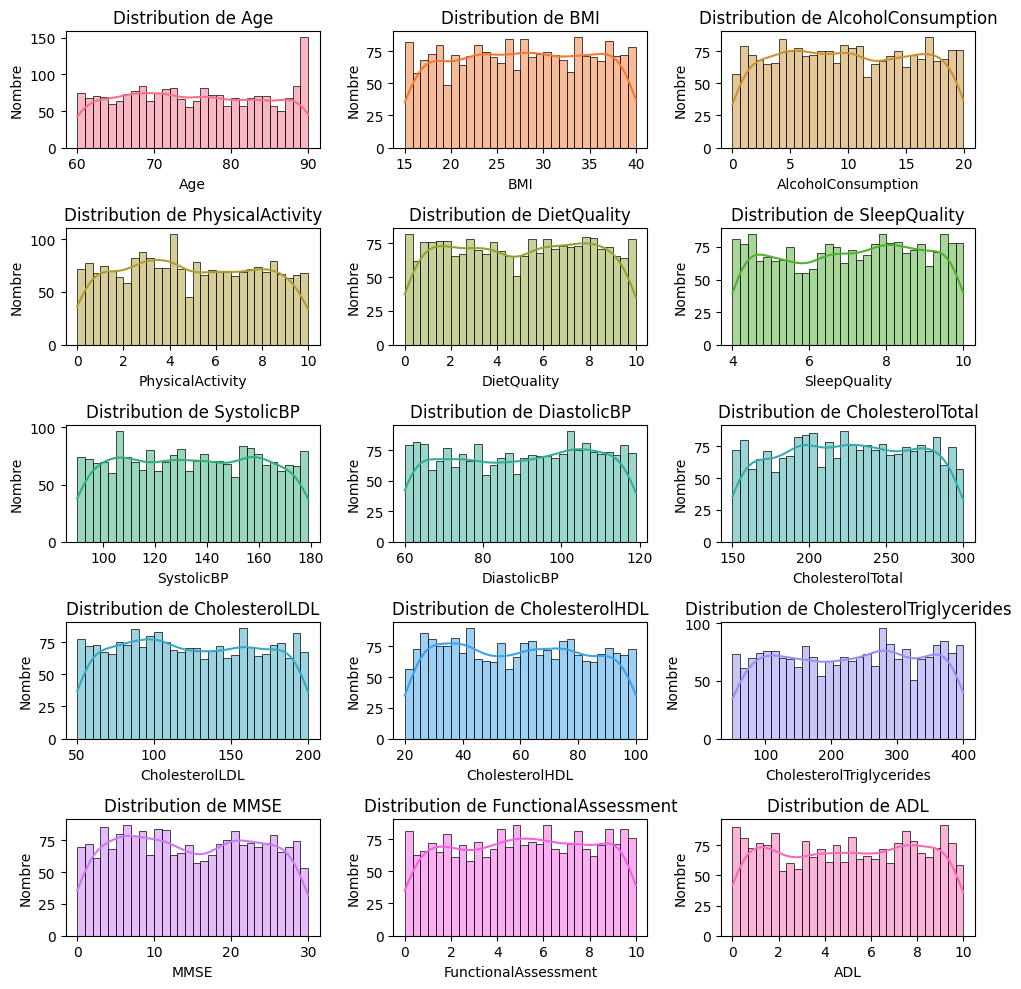

In [12]:
# Définition de la palette de couleurs
palette_num = sns.color_palette("husl", len(colonnes_num_continues))

# Représentation graphique de chaque colonne
plt.figure(figsize=(10,10))
for i, colonne in enumerate(colonnes_num_continues):
    plt.subplot((len(colonnes_num_continues) + 2) // 3, 3, i + 1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette_num[i])
    plt.title(f'Distribution de {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Nombre')
plt.tight_layout()
plt.show()

La distribution des variables semble uniforme, ce qui est cohérent avec l'échec du test de Shapiro car une distribution uniforme est très différentes d'une distribution normale. Pour la suite, il faudra être vigilant à choisir un modèle qui n'exige pas la normalité.

**Distribution de Age**
- La distribution de l'âge des patients est relativement uniforme, avec une répartition étendue entre 60 et 90 ans. Cela est utile pour notre analyse, car une représentation équilibrée de différentes tranches d'âge permet une évaluation plus complète des effets de l'âge sur la maladie d'Alzheimer. La littérature souligne que l'incidence de la maladie augmente avec l'âge, et une telle répartition permet de mieux comprendre les variations dans la prévalence et la progression de la maladie à travers différentes phases de la vieillesse.

**Distribution de BMI (Indice de Masse Corporelle)**
- L'indice de masse corporelle (BMI) montre une répartition relativement uniforme. Cette mesure est cruciale pour évaluer les relations potentielles entre l'obésité ou le surpoids et le risque de développer Alzheimer. Une répartition uniforme du BMI dans notre échantillon permet d'examiner de manière plus détaillée comment le poids corporel peut influencer la santé cognitive.

**Distribution de Consommation d'Alcool**
- La distribution de la consommation hebdomadaire d'alcool est également uniforme. Étant donné que des études ont suggéré un lien entre la consommation d'alcool et le risque de démence, une répartition équilibrée dans notre échantillon permet d'analyser comment les niveaux de consommation peuvent affecter le risque de maladie d'Alzheimer.

**Distribution de Activité Physique**
- L'activité physique hebdomadaire est répartie de manière uniforme dans l'échantillon, ce qui est essentiel pour évaluer son impact potentiel sur la santé cognitive. Les recommandations et études antérieures indiquent que l'exercice régulier peut réduire le risque de développer des troubles cognitifs, et une distribution équilibrée de cette variable permet de mieux comprendre son effet protecteur.

**Distribution de Qualité du Régime Alimentaire**
- Le score de qualité du régime alimentaire montre également une répartition uniforme. La qualité de l'alimentation est souvent associée à divers aspects de la santé, y compris les risques cognitifs. Une répartition équilibrée aide à examiner comment différents niveaux de qualité alimentaire influencent le risque de maladie d'Alzheimer.

**Distribution de Qualité du Sommeil**
- La distribution des scores de qualité du sommeil est relativement uniforme. Étant donné que des recherches suggèrent que les troubles du sommeil peuvent avoir un impact sur la santé cognitive, une répartition équilibrée permet d'explorer comment les variations dans la qualité du sommeil peuvent être liées à la maladie d'Alzheimer.

**Distribution de Pression Artérielle Systolique et Diastolique**
- Les distributions des pressions artérielles systolique et diastolique semblent uniformes. La pression artérielle est un facteur de risque cardiovasculaire important, et son impact sur la santé cognitive est bien documenté. Une répartition uniforme de ces variables permet une analyse détaillée de leur relation avec le risque de démence.

**Distribution de Cholestérol Total, LDL, HDL et Triglycérides**
- Les distributions des niveaux de cholestérol total, LDL, HDL et des triglycérides sont également uniformes. Les lipides sanguins jouent un rôle dans la santé cardiovasculaire et cognitive, et une répartition équilibrée de ces mesures permet d'examiner comment les niveaux de cholestérol et de triglycérides influencent le risque de maladie d'Alzheimer.

**Distribution de Score MMSE**
- Le score du Mini-Mental State Examination (MMSE) montre une distribution uniforme. Le MMSE est un indicateur clé de la fonction cognitive. Une répartition équilibrée permet d'analyser les variations dans les capacités cognitives à travers l'échantillon et d'explorer les relations avec les autres variables.

**Distribution de Évaluation Fonctionnelle**
- La distribution du score d'évaluation fonctionnelle est relativement uniforme. Cette mesure évalue les capacités fonctionnelles générales et est importante pour comprendre comment les déficiences fonctionnelles peuvent être liées à la maladie d'Alzheimer.

**Distribution de Score ADL (Activités de la Vie Quotidienne)**
- Le score ADL montre une répartition uniforme. Les activités de la vie quotidienne sont essentielles pour l'évaluation de la dépendance et de la fonction cognitive, et une distribution équilibrée permet d'examiner comment les difficultés dans ces activités sont associées à la maladie d'Alzheimer.

### 3.2.4 - Corrélation entre les variables

On étudie seulement la corrélation entre les variables numérique continues. Étudier la corrélation de variables binaires, comme par exemple 'Gender', serait inutile car ces variables n'ont pas la même variabilité que les données continues.

Nos données ne suivant pas une loi normale, nous utiliserons la corrélation de Spearman.

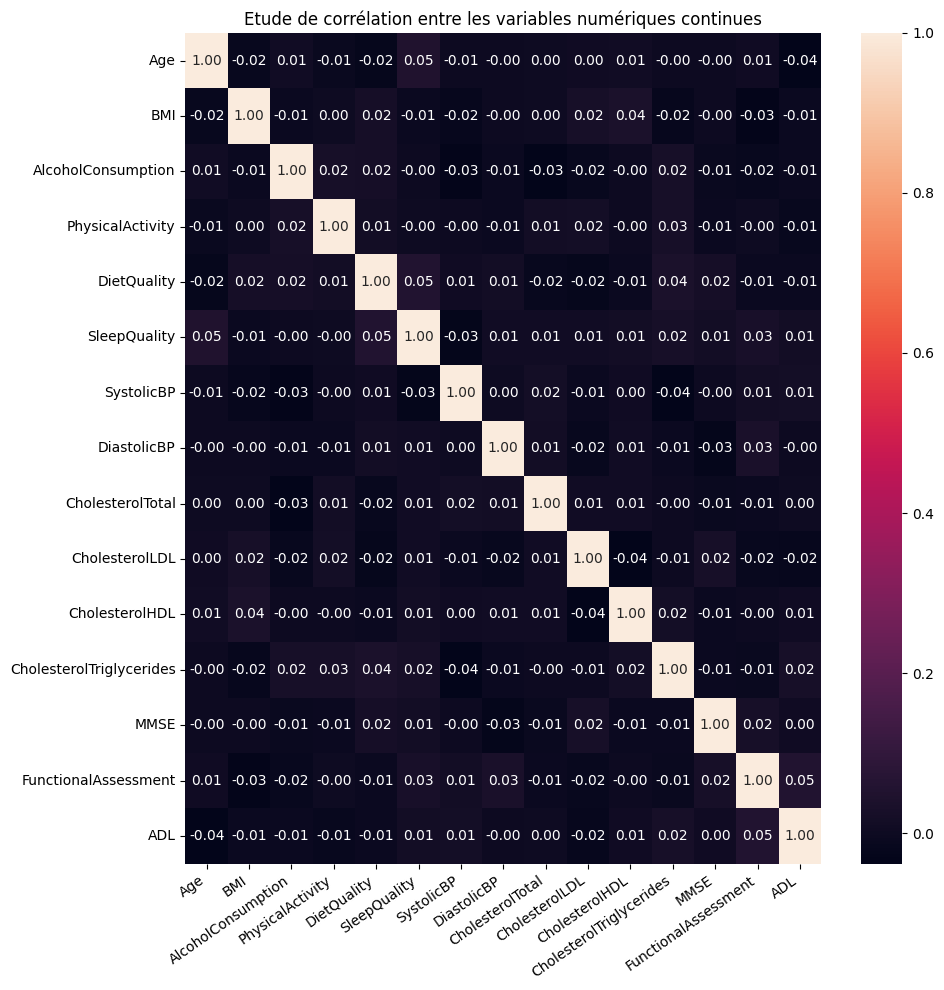

In [13]:
#Etude de corrélation
plt.figure(figsize = (10,10))
sns.heatmap(df[colonnes_num_continues].corr(method='spearman'), annot = True, fmt='.2f')
plt.title('Etude de corrélation entre les variables numériques continues')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

- **Faibles Corrélations** : Les valeurs de corrélation proches de zéro suggèrent que les variables numériques continues n'ont pas de relation linéaire notable entre elles. En d'autres termes, les variations dans une variable continue ne sont pas systématiquement associées aux variations dans une autre variable.

- **Implications pour l'Analyse** : Cette absence de corrélation pourrait indiquer que ces variables sont relativement indépendantes les unes des autres. Lors de la construction de modèles prédictifs, il peut être pertinent d'examiner ces variables individuellement plutôt que de chercher des interactions linéaires entre elles.

### 3.2.5 - Distribution en fonction de la variable Diagnosis (Target)

Nous allons maintenant observer la distribution de ces variables en fonction de la variable Diagnosis.

Pour le test de significativité, nous utiliserons le test de Mann-Whtney U. C'est un test non paramétrique qui ne fait pas d'hypothèse sur la distribution des données. Ce test est approprié pour comparer les distribution de deux groupes indépendants.

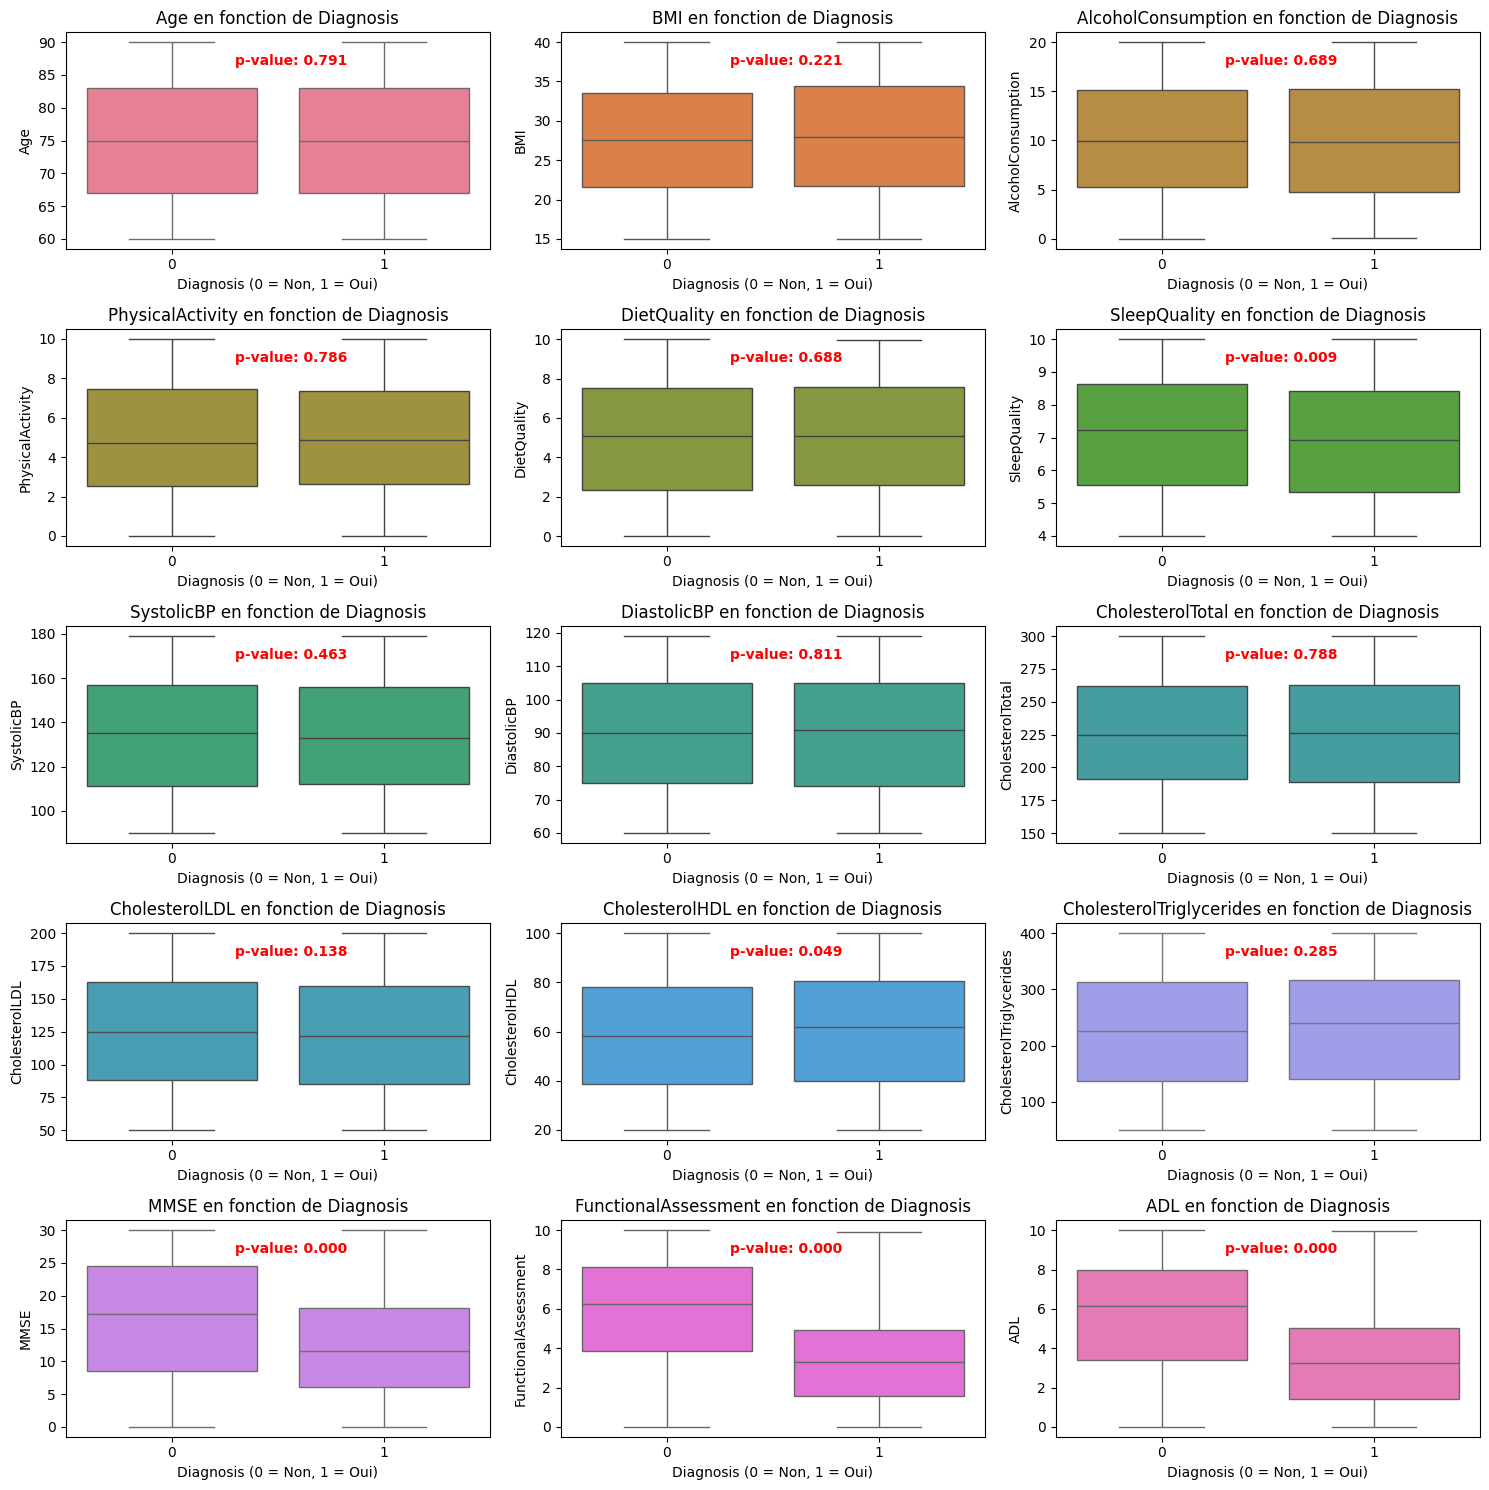

In [14]:
# Représentation graphique de chaque colonne en fonction de la variable Diagnosis avec test de significativité
plt.figure(figsize=(15, 15)) 
for i, colonne in enumerate(colonnes_num_continues):
    plt.subplot((len(colonnes_num_continues) + 2) // 3, 3, i + 1)
    sns.boxplot(x=df["Diagnosis"], y=df[colonne], color=palette_num[i])
    plt.title(f'{colonne} en fonction de Diagnosis')
    plt.xlabel('Diagnosis (0 = Non, 1 = Oui)')
    plt.ylabel(colonne)
    
    # Test de Mann-Whitney U
    group_0 = df[df["Diagnosis"] == 0][colonne]
    group_1 = df[df["Diagnosis"] == 1][colonne]
    stat, p_value = mannwhitneyu(group_0, group_1)
    
    # Affichage du p-value sur le graphique
    ymax = df[colonne].max()
    plt.annotate(f'p-value: {p_value:.3f}', 
                 xy=(0.4, 0.85), xycoords='axes fraction', 
                 fontsize=10, color='red', weight='bold')

plt.tight_layout()
plt.show()

**Qualité du sommeil** :
- **Résultat** : Les patients atteints de la maladie d'Alzheimer présentent une qualité de sommeil significativement inférieure à celle des patients non diagnostiqués (p-value : 0.009).
- **Lien avec la littérature** : La qualité du sommeil est souvent altérée chez les individus atteints de la maladie d'Alzheimer. Des recherches indiquent que les troubles du sommeil peuvent servir de signes avant-coureurs de cette maladie *(Casagrande et al., 2022)*. Ces troubles jouent un rôle significatif dans la perturbation des mécanismes de consolidation de la mémoire et influencent également l'élimination des métabolites accumulés dans les synapses, tels que les plaques amyloïdes, qui sont associées à la progression de la maladie *(Prince et al., 2013)*.

**Taux de cholestérol HDL** :
- **Résultat** : Les patients atteints de la maladie d'Alzheimer ont un taux de cholestérol HDL significativement plus élevé que ceux non diagnostiqués (p-value : 0.049).
- **Lien avec la littérature** : Les résultats concernant le cholestérol HDL présentent une complexité notable. Bien que des niveaux élevés de cholestérol HDL soient habituellement associés à une meilleure santé cardiovasculaire, des recherches indiquent que des niveaux exceptionnellement élevés peuvent être liés à des processus pathologiques spécifiques à la maladie d'Alzheimer. En effet, des niveaux extrêmes de cholestérol HDL sont souvent associés à des conditions complexes, et ces niveaux élevés peuvent entraîner une dysfonction des particules HDL. Cette dysfonction pourrait réduire l'efficacité des particules HDL dans le transport de facteurs essentiels comme l'apolipoprotéine A1 (ApoA1) vers le cerveau, ce qui pourrait contribuer à des mécanismes pathologiques dans des maladies telles que la maladie d'Alzheimer *(Kjeldsen et al., 2021)*.

 **Score au MMSE (Mini-Mental State Examination)** :
- **Résultat** : Les patients atteints de la maladie d'Alzheimer ont un score au MMSE significativement inférieur à celui des patients non diagnostiqués (p-value < 0.001).
- **Lien avec la littérature** : Le MMSE est un outil standard pour évaluer les capacités cognitives et la gravité de la démence *(Folstein, 1975)*. Un score faible au MMSE est caractéristique de la déficience cognitive dans la maladie d'Alzheimer. Les patients avec Alzheimer montrent des déficits cognitifs qui se manifestent clairement dans les tests de mémoire, d'attention et de langage, comme mesuré par le MMSE.

**Score d'évaluation fonctionnelle** :
- **Résultat** : Les patients atteints de la maladie d'Alzheimer ont un score d'évaluation fonctionnelle significativement inférieur à celui des patients non diagnostiqués (p-value < 0.001).
- **Lien avec la littérature** : L'évaluation fonctionnelle mesure l'impact de la maladie sur la capacité à effectuer des activités de la vie quotidienne. La détérioration fonctionnelle est une caractéristique clé de la progression de la maladie d'Alzheimer, avec des patients perdant progressivement leur autonomie et nécessitant une assistance croissante. Les scores faibles reflètent des déficits dans les activités quotidiennes et la capacité à gérer les tâches domestiques et personnelles.

**ADL (Activités de la Vie Quotidienne)** :
- **Résultat** : Les patients atteints de la maladie d'Alzheimer ont un score ADL significativement inférieur à celui des patients non diagnostiqués (p-value < 0.001).
- **Lien avec la littérature** : Les ADL évaluent la capacité à réaliser les activités essentielles comme l'hygiène personnelle, la gestion des repas et les soins personnels. Les patients atteints de la maladie d'Alzheimer montrent des déficits dans ces activités à mesure que la maladie progresse, ce qui est cohérent avec les résultats de diverses études. Une diminution des scores ADL est souvent utilisée comme un indicateur de la gravité de la démence et de la nécessité d'une aide supplémentaire *(Zhou et al, 2022)*.

## 3.3 - Variables catégorielles numériques

In [15]:
# Sélection des variables numériques continues
colonnes_cat = df.columns.difference(colonnes_num_continues).difference(['Diagnosis']).to_list()

### 3.3.1 - Distribution des variables

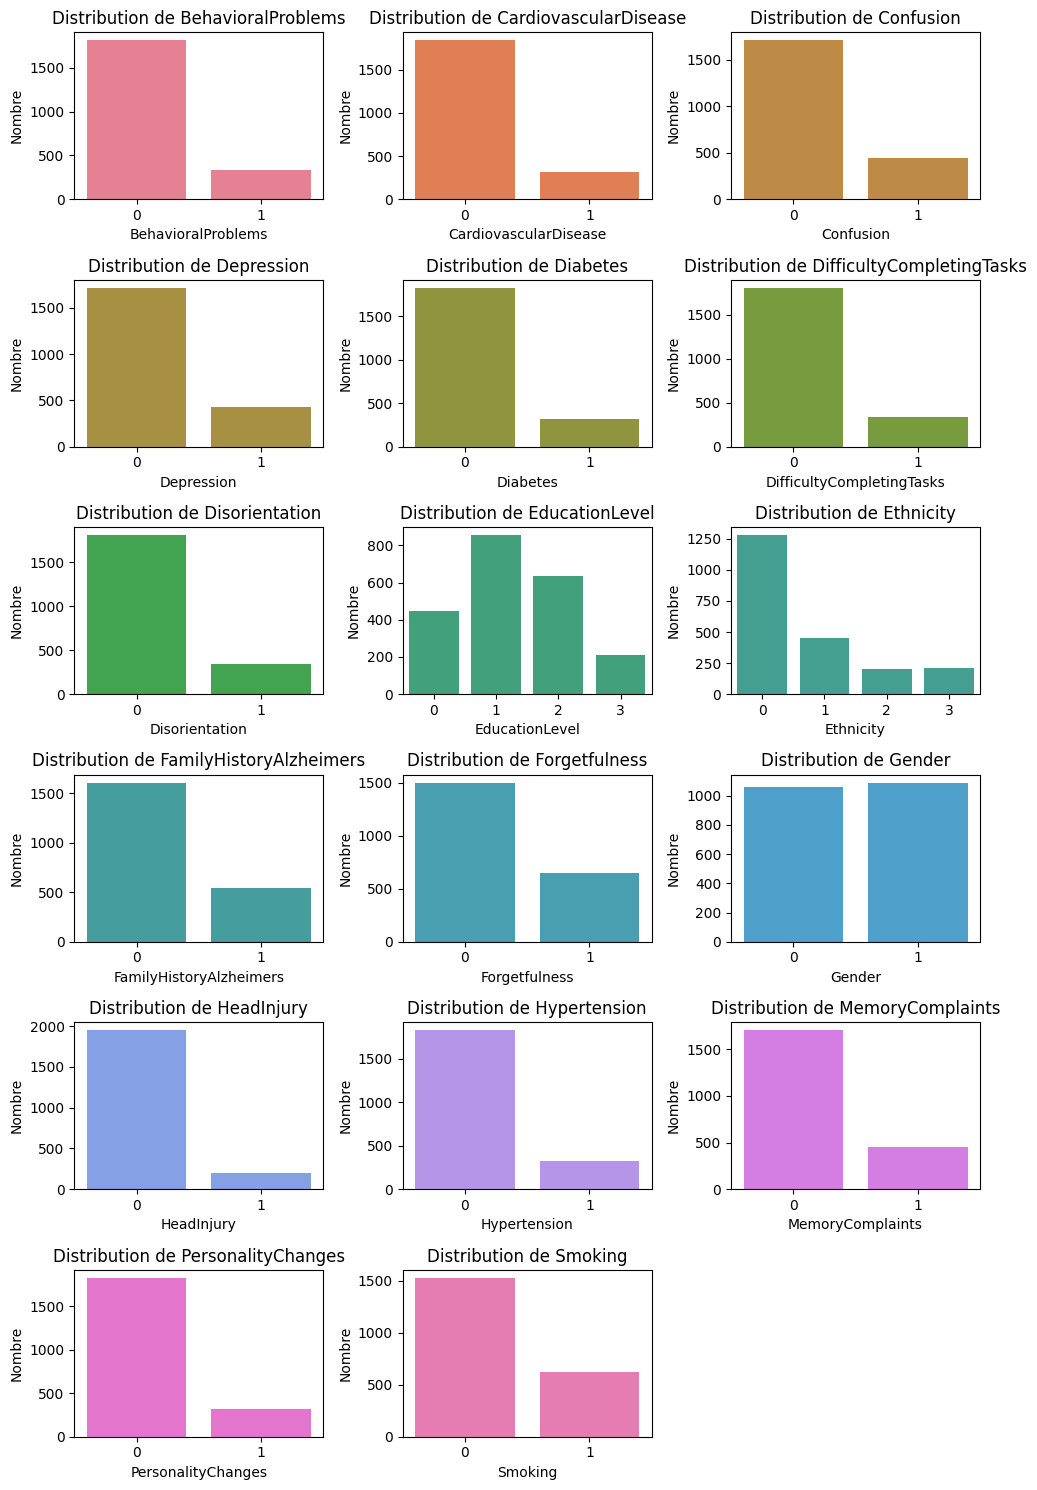

In [16]:
# Définition de la palette de couleurs
palette_cat = sns.color_palette("husl", len(colonnes_cat))

# Représentation graphique de chaque colonne
plt.figure(figsize=(10,15))
for i, colonne in enumerate(colonnes_cat):
    plt.subplot((len(colonnes_cat) + 2) // 3, 3, i + 1)
    sns.countplot(x=df[colonne], color=palette_cat[i])
    plt.title(f'Distribution de {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Nombre')
plt.tight_layout()
plt.show()

- Globalement, la dataset se compose majoritairement de patients sains, sans problèmes de santé.
- Le niveau d'éducation le plus représenté est le secondaire, suivi par les titulaires de licence. Ce facteur est crucial à considérer, car de nombreuses études montrent que le niveau d'éducation peut jouer un rôle protecteur contre la maladie d'Alzheimer, souvent décrit comme la "réserve cognitive". Un niveau d'éducation plus élevé pourrait potentiellement retarder l'apparition des symptômes de la maladie.
- Les Caucasiens sont les plus largement représentés dans ce jeu de données. Cette surreprésentation ethnique pourrait limiter l'applicabilité des résultats à des populations plus diversifiées. Pourtant, il est essentiel de reconnaître que l'ethnicité peut influencer à la fois la prévalence de la maladie d'Alzheimer et la manière dont elle est diagnostiquée ou perçue. Il est donc important de tenir compte de cette variable lors de l'interprétation des résultats.
- Les hommes et les femmes sont également représentés dans ce jeu de données. Cet équilibre est pertinent, car bien que la maladie d'Alzheimer touche les deux sexes, des études indiquent que les femmes sont plus susceptibles de développer la maladie, en particulier après l'âge de 80 ans. Cette répartition équilibrée permet donc une analyse comparative entre les sexes, ce qui est essentiel pour comprendre les différences potentielles dans la manifestation et la progression de la maladie.


### 3.3.2 - Distribution en fonction de la variable Diagnosis (Target)

Pour l'analyse des variables catégorielles, c'est le test du chi carré qui est approprié. Le test du chi carré compare la distribution générale des catégories.

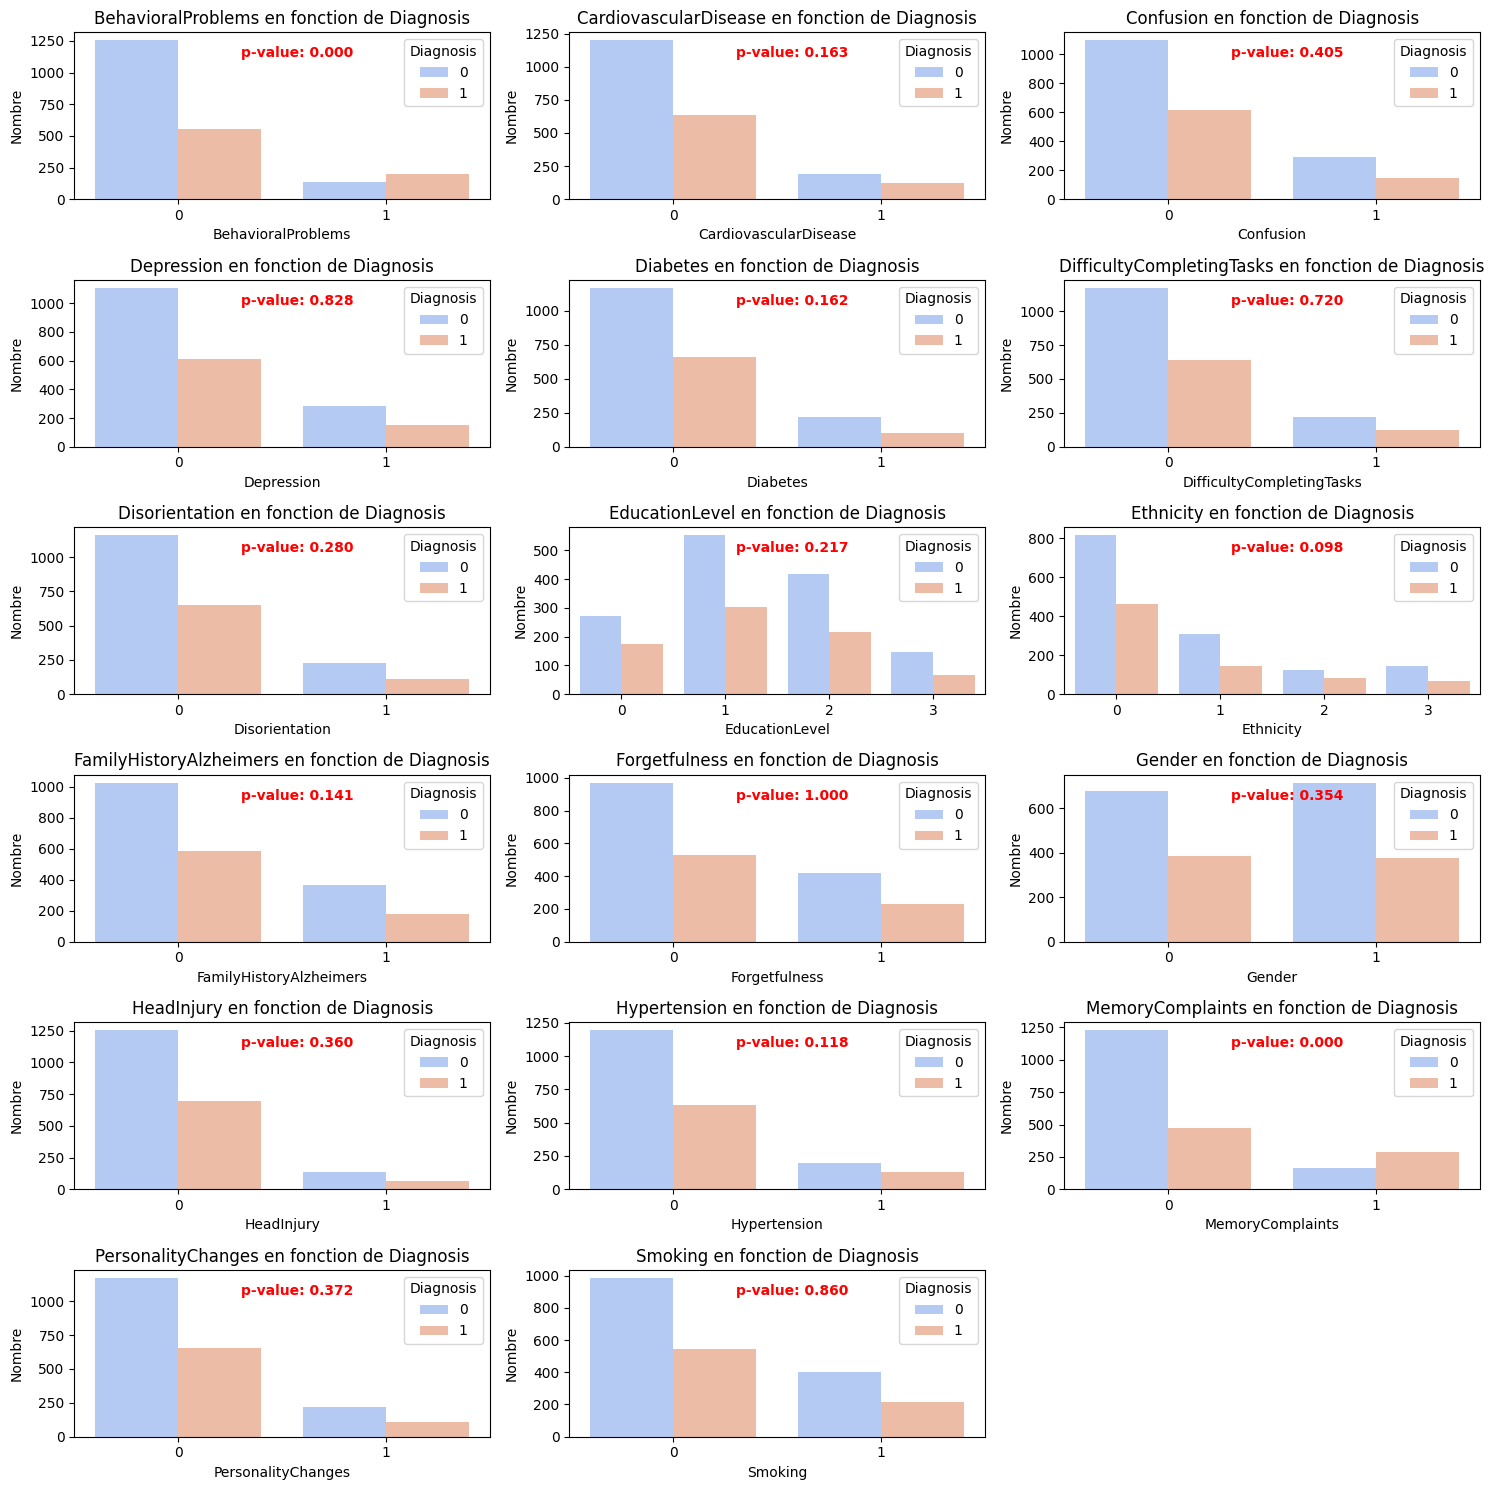

In [17]:
# Déterminer le nombre de couleurs nécessaires
unique_diagnoses = df['Diagnosis'].nunique()

# Représentation graphique de chaque colonne en fonction de la variable Diagnosis avec test de significativité
plt.figure(figsize=(15,15))
for i, colonne in enumerate(colonnes_cat):
    plt.subplot((len(colonnes_cat) + 2) // 3, 3, i + 1)
    sns.countplot(x=colonne, hue='Diagnosis', data=df, palette="coolwarm")
    plt.title(f'{colonne} en fonction de Diagnosis')
    plt.xlabel(colonne)
    plt.ylabel('Nombre')
    
    # Test du chi carré
    contingency_table = pd.crosstab(df[colonne], df["Diagnosis"])
    chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
    
    # Affichage du p-value sur le graphique
    plt.annotate(f'p-value: {p_value:.3f}', 
                 xy=(0.4, 0.85), xycoords='axes fraction', 
                 fontsize=10, color='red', weight='bold')

plt.tight_layout()
plt.show()

**Variables avec p-value très faibles (indication d'association significative)**

- **BehavioralProblems (p-value = 0.000)** : Une association très forte est observée entre les problèmes comportementaux et le diagnostic. La littérature souligne que les changements de comportement, comme l'agitation, l'agressivité et l'errance, sont souvent observés chez les patients atteints d'Alzheimer, notamment aux stades avancés.
- **MemoryComplaints (p-value = 0.000)** : Les plaintes concernant la mémoire sont également fortement associées au diagnostic. Cela est conforme aux critères diagnostiques de la maladie d'Alzheimer, où les troubles de la mémoire, notamment la difficulté à se souvenir des événements récents, sont un symptôme précoce et central.

**Variables avec p-value moyennement élevées (pas d'association significative mais à surveiller)**

- **Ethnicity (p-value = 0.098)** : Bien que non statistiquement significatif, l'origine ethnique pourrait jouer un rôle dans la prévalence ou la perception des symptômes d'Alzheimer. Il est important de noter que, dans ce jeu de données, les Caucasiens sont largement plus représentés que les autres groupes ethniques. Cela pourrait influencer les résultats, en limitant la capacité de détecter une association significative pour cette variable. Certaines études ont montré des différences dans la prévalence de la démence parmi différents groupes ethniques, probablement dues à des facteurs génétiques, socio-économiques ou culturels.
- **Hypertension (p-value = 0.118)** : L'hypertension est un facteur de risque modifiable pour de nombreuses maladies cardiovasculaires, et elle a également été liée à un risque accru de développer une démence, y compris la maladie d'Alzheimer.
- **CardiovascularDisease (p-value = 0.163)** et **Diabetes (p-value = 0.162)** : Ces deux conditions, bien que non significativement associées au diagnostic dans cet échantillon, sont reconnues dans la littérature pour leur rôle dans l'augmentation du risque de développer la maladie d'Alzheimer. L'absence d'association statistique ici pourrait refléter la complexité des interactions entre ces maladies chroniques et la démence, qui peuvent être influencées par de nombreux facteurs confondants, y compris la durée et la sévérité de ces conditions.

**Variables avec p-value élevées (aucune association significative)**

- **Confusion (p-value = 0.405), Disorientation (p-value = 0.280), Forgetfulness (p-value = 1.000)** : Bien que ces symptômes soient fréquemment associés à la maladie d'Alzheimer, les p-values élevées indiquent qu'il n'y a pas d'association statistiquement significative dans cet échantillon. Cette absence d'association pourrait être due à des limitations dans la qualité ou la taille de l'échantillon, ou à une variabilité dans la manière dont ces symptômes ont été rapportés ou mesurés.
- **Depression (p-value = 0.828)** et **PersonalityChange (p-value = 0.372)** : La dépression et les changements de personnalité sont souvent observés chez les patients atteints de démence, y compris Alzheimer, mais dans cet échantillon, ils n'ont pas montré de lien significatif avec le diagnostic. Cela pourrait être dû à la difficulté à diagnostiquer ces symptômes de manière objective ou à leur survenue dans diverses conditions neurologiques.
- **EducationLevel (p-value = 0.217)** : Le niveau d'éducation a été étudié comme un facteur de protection contre la démence en raison de la réserve cognitive, mais ici, aucune association significative n'a été trouvée. Cela peut-être dû au manque de variabilité dans ce jeu de données, avec une majorité de patient étant allé jusqu'au secondaire.
- **Gender (p-value = 0.354)** : Bien que les femmes soient souvent plus touchées par la maladie d'Alzheimer, ce qui pourrait être lié à une espérance de vie plus longue, cette analyse n'a pas trouvé de lien statistiquement significatif entre le genre et le diagnostic. 

# IV- Modélisation

On commence par séparer nos données en train et test puis on utilise un StandardScaler. 

On utilise la stratification pour s'assurer que la distribution des classes (dans ce cas, la diagnostic d'Alzheimer) est la même dans les deux ensembles. Cela est particulièrement important dans les cas de classification déséquilibrée (c'est-à-dire lorsque les classes ne sont pas également représentées) pour éviter que le modèle soit formé ou évalué sur un échantillon qui ne reflète pas bien la distribution réelle des classes.

In [18]:
# Séparation des données et de la Target : 
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis'].copy()
    
# Séparation en ensemble de train et test : 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
    
# Standardisation du test et du train :     
scaler = StandardScaler()
scaler.fit(X_train)    
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

On défini nos fonctions pour la suite :

- La fonction **score_metier** calcule un "score métier" à partir de la matrice de confusion, permettant d'évaluer la pertinence du modèle 
    en fonction des erreurs plus ou moins graves dans le contexte métier.

In [19]:
def score_metier(y_test, y_pred):
    '''Créer un score métier à partir de la matrice de confusion.
    :param: y_test (vraies valeurs), y_pred (valeurs prédites par le modèle)
    :return: gain (score métier)
    '''
    TP_coeff = -1  # Moins grave mais important
    FP_coeff = +1  # Peut causer des traitements inutiles
    FN_coeff = +10  # Le plus grave, erreur médicale critique
    TN_coeff = 0  # Pas d'erreur ici

    # Extraction des valeurs de la matrice de confusion
    (TN, FP, FN, TP) = metrics.confusion_matrix(y_test, y_pred).ravel()

    # Calcul du gain en pondérant chaque type de classification par son coefficient associé
    gain = (TP*TP_coeff + TN*TN_coeff + FP*FP_coeff + FN*FN_coeff)/(TN+FP+FN+TP)
    
    return gain

- La fonction **seuil_metier** identifie le meilleur seuil de décision pour maximiser le score métier.

In [20]:
def seuil_metier(model, X, y, thresholds):
    '''
    Identifie le meilleur seuil de décision pour maximiser le score métier.
    
    :param model: Le modèle utilisé pour faire les prédictions.
    :param X: Les données d'entrée utilisées pour prédire.
    :param y: Les vraies étiquettes de classe.
    :param thresholds: Liste des seuils de décision possibles à tester.
    :return: Le meilleur seuil, le score associé et la liste des scores pour chaque seuil testé.
    '''
    y_probs = model.predict_proba(X)[:, 1]
    best_score = float('inf')
    best_threshold = 0
    scores = []
    
    for threshold in thresholds:
        y_pred = [1 if prob > threshold else 0 for prob in y_probs]
        score = score_metier(y, y_pred)
        scores.append(score)
        
        if score < best_score:
            best_score = score
            best_threshold = threshold
            
    return best_threshold, best_score, scores

- La fonction **eval_score** calcule, affiche et enregistre les différentes métriques pour un modèle donné

In [21]:
def eval_score(model, X_test, y_test, seuil=0.5):
    '''Calcule, affiche et enregistre les différentes métriques pour un modèle donné.
    :param: model, X_test (dataframe de validation), y_test (vraies valeurs), seuil (seuil de détermination des prédictions)
    :return: affiche les métriques, la matrice de confusion et la courbe ROC.
    '''    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred = np.where(y_pred_proba > seuil, 1, 0)
    
    metier = score_metier(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, zero_division=1)
    recall = metrics.recall_score(y_test, y_pred, zero_division=1)
    f1_score = metrics.f1_score(y_test, y_pred, zero_division=1)
    fbeta_score = metrics.fbeta_score(y_test, y_pred, beta=2, zero_division=1)
    rocauc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    print('Score métier :{:.2f}'.format(metier))
    print('Accuracy score : {:.2f}'.format(accuracy))
    print('Precision score : {:.2f}'.format(precision))
    print('Recall score : {:.2f}'.format(recall))
    print('F1 score : {:.2f}'.format(f1_score))
    print('Fbeta score : {:.2f}'.format(fbeta_score))
    print('ROC AUC score : {:.2f}'.format(rocauc))
    
    
    # Matrice de confusion
    conf_mat = metrics.confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,4))
    sns.heatmap(conf_mat, annot=True, cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Matrice de confusion')
    plt.show()

    # Courbe ROC
    fig, ax = plt.subplots(figsize=(6, 5))
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Courbe ROC')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    return metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba

La fonction **logToMlflow** enregistre une expérimentation sur MLFlow, incluant les hyperparamètres, les métriques et le modèle avec son seuil optimisé

In [22]:
# URI de suivi est configuré pour utiliser HTTP
mlflow.set_tracking_uri("http://localhost:5000")

def logToMLflow(model, X_train, X_test, y_train, y_test, name="", params="", training_tag="", thresholds=np.linspace(0, 1, 100)):
    """Enregistre une expérimentation sur MLFlow, incluant les hyperparamètres, les métriques, 
    et le modèle avec son seuil optimisé."""
        
    # Start an MLflow run
    with mlflow.start_run(run_name=name):
        # Log the hyperparameters
        if params:
            mlflow.log_params(params)
        
        model_fit = model.fit(X_train, y_train)
        
        # infer model signature
        signature = infer_signature(X_train, model_fit.predict(X_train))
        
        # Optimiser le seuil métier
        best_threshold_train, best_score_train, _ = seuil_metier(model_fit, X_train, y_train, thresholds)

        # Prédiction sur le set de test avec le seuil optimal
        y_pred_proba_test = model_fit.predict_proba(X_test)[:, 1]
        y_pred_test = np.where(y_pred_proba_test > best_threshold_train, 1, 0)
        
        # Calcul et enregistrement des metriques 
        metier, accuracy, precision, recall, f1_score, fbeta_score, rocauc, y_pred_proba = eval_score(model_fit, X_test, y_test)
   
        mlflow.log_metric("score_métier", metier)
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1_score)
        mlflow.log_metric("fbeta_score", fbeta_score)
        mlflow.log_metric("rocauc", rocauc)
        mlflow.log_metric("best_threshold", best_threshold_train)
        mlflow.log_metric("best_score_metier", best_score_train)
        
        # Set a tag that we can use to remind ourselves what this run was for
        if training_tag:
            mlflow.set_tag("Training Info", training_tag)

        # construct an evaluation dataset from the test set
        eval_data = X_test.copy()
        eval_data['target'] = y_test.values
        
        # Log the model
        mlflow.sklearn.log_model(model_fit, 'model', signature=signature)
        
        # Evaluate the model
        model_info = mlflow.get_artifact_uri('model')
        result = mlflow.evaluate(
            model_info,
            eval_data,
            targets="target",
            model_type="classifier",
            evaluators=["default"],
        )

In [23]:
def optimize_model(model, params, X_train, y_train, run_name, thresholds=np.linspace(0, 1, 100)):
    """
    Optimise un modèle en utilisant une recherche en grille (GridSearchCV) et enregistre 
    les résultats dans MLflow, en optimisant également le seuil de décision.
    """
    metier_scorer = make_scorer(score_metier, greater_is_better=False)
    
    with mlflow.start_run(run_name=run_name):
        steps = [('scaler', StandardScaler()), ('over', SMOTE(random_state=0)), ('model', model)]
        pipeline = Pipeline(steps=steps)
        grid = GridSearchCV(pipeline,
                            params,
                            cv=5,
                            n_jobs=-1,
                            scoring=metier_scorer,
                            return_train_score=True,
                            verbose=1)
        grid.fit(X_train, y_train)

        # Meilleur modèle trouvé par GridSearchCV
        best_model = grid.best_estimator_
        
        # Optimisation du seuil métier pour le meilleur modèle
        best_threshold_train, best_score_train, _ = seuil_metier(best_model, X_train, y_train, thresholds)
        
        mlflow.log_metric("best_threshold", best_threshold_train)
        mlflow.log_metric("best_score_metier", best_score_train)
        mlflow.log_params(grid.best_params_)
        mlflow.log_metric('best_score', grid.best_score_)
        
        return grid.best_estimator_

Lorsqu'on optimise un modèle de machine learning, le choix des hyperparamètres à tester est crucial pour obtenir les meilleures performances. Voici une explication pour chaque modèle que tu as utilisé :

**Logistic Regression (Régression Logistique)** 

- **penalty** : Ce paramètre spécifie la régularisation à utiliser pour éviter l'overfitting. Les options courantes sont l1 (régularisation Lasso, qui peut mener à des coefficients nuls, donc à un modèle plus simple) et l2 (régularisation Ridge, qui pénalise les grands coefficients sans les rendre nuls).
- **solver** : Le solver est l'algorithme utilisé pour trouver les coefficients. saga est souvent choisi car il supporte l1 et l2.
- **C** : Ce paramètre inverse la force de régularisation (plus C est petit, plus la régularisation est forte). Tester plusieurs valeurs de C permet de trouver un bon compromis entre biais et variance.

**Decision Tree (Arbre de Décision)**

- **criterion** : Il s'agit de la fonction utilisée pour mesurer la qualité d'un split. gini et entropy sont les plus courants. Tester les deux peut aider à déterminer lequel est le plus approprié pour ton jeu de données.
- **max_depth** : Limiter la profondeur d'un arbre peut réduire le surapprentissage (overfitting). Tester différentes profondeurs permet de trouver un arbre qui généralise bien.

**Random Forest (Forêt Aléatoire)**

- **n_estimators** : C'est le nombre d'arbres dans la forêt. En général, plus il y a d'arbres, mieux c'est, mais cela augmente aussi le temps de calcul.
- **max_features** : Ce paramètre limite le nombre de caractéristiques prises en compte pour chaque split. Des valeurs comme sqrt ou log2 sont couramment utilisées pour éviter l'overfitting.
- **max_depth** : Comme pour les arbres de décision, limiter la profondeur des arbres peut être bénéfique pour la généralisation.

**XGBoost**

- **max_depth** : Comme précédemment, il contrôle la profondeur des arbres.
- **n_estimators** : Nombre d'arbres à construire.
- **learning_rate** : Le taux d'apprentissage réduit le poids donné à chaque arbre supplémentaire. Un taux d'apprentissage plus faible conduit souvent à de meilleures performances, mais nécessite plus d'arbres.

**LightGBM**

- **n_estimators** et **max_depth** : Similaires à ceux des autres modèles basés sur des arbres.
- **num_leaves** : Ce paramètre contrôle la complexité de chaque arbre en limitant le nombre de feuilles (plus il y en a, plus l'arbre peut être complexe).
- **force_col_wise** : Ce paramètre force la formation de l'arbre par colonnes, ce qui peut parfois améliorer les performances.

**GaussianNB()**

- **model_var_smoothing** : Ce paramètre contrôle le lissage de la variance, ce qui ajoute une petite valeur constante à la variance calculée pour éviter la division par zéro dans les calculs. Des valeurs très petites peuvent être testées (par exemple, 1e-9, 1e-8, 1e-7).

In [24]:
# Définition des hyperparamètres pour chaque modèle
models_params = {
    LogisticRegression(): {
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['saga'],
        'model__C': [1e-5, 1e-2, 1, 10, 100]
    },
    DecisionTreeClassifier(): {
        'model__criterion': ['gini', 'entropy'],
        'model__max_depth': [2, 5, 10, 20, None]
    },
    RandomForestClassifier(): {
        'model__n_estimators': [100, 300, 500],
        'model__max_features': ['sqrt', 'log2'],
        'model__max_depth': [2, 5, 10, 20, None]
    },
    XGBClassifier(): {
        'model__max_depth': [2, 4, 6],
        'model__n_estimators': [100, 300, 500],
        'model__learning_rate': [0.01, 0.05, 0.1]
    },
    LGBMClassifier(): {
        'model__n_estimators': [100, 300, 500],
        'model__max_depth': [2, 5, 10, None, -1], 
        'model__num_leaves': [31, 64],
        'model__force_col_wise': [True]
    },
    GaussianNB(): {
        'model__var_smoothing': [1e-9, 1e-8, 1e-7]
    }
}


In [25]:
# Optimisation de chaque modèle avec suivi MLflow
optimized_models = {}
for model, params in models_params.items():
    run_name = f"GridSearch_{model.__class__.__name__}"
    best_model = optimize_model(model, params, X_train, y_train, run_name)
    optimized_models[model.__class__.__name__] = best_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 1111, number of negative: 1111
[LightGBM] [Info] Total Bins 4393
[LightGBM] [Info] Number of data points in the train set: 2222, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Fitting 5 folds for each of 3 candidates, totalling 15 fits


Testing LogisticRegression with optimized parameters...
Score métier :0.57
Accuracy score : 0.80
Precision score : 0.68
Recall score : 0.80
F1 score : 0.73
Fbeta score : 0.77
ROC AUC score : 0.87


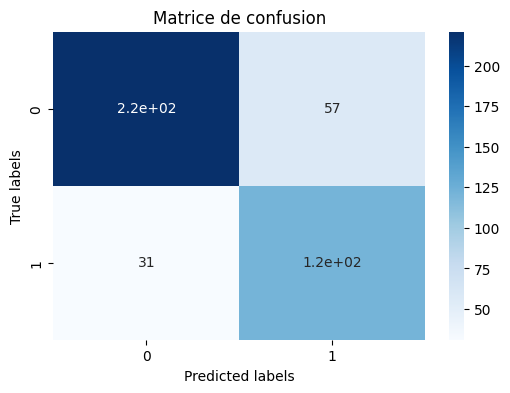

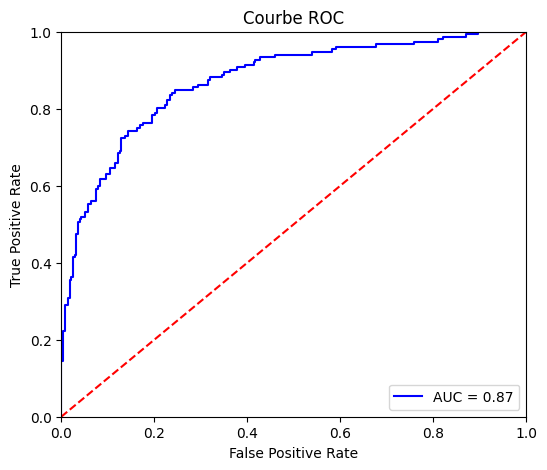

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-inte

LogisticRegression Testing complete.
Testing DecisionTreeClassifier with optimized parameters...
Score métier :0.05
Accuracy score : 0.94
Precision score : 0.94
Recall score : 0.90
F1 score : 0.92
Fbeta score : 0.91
ROC AUC score : 0.94


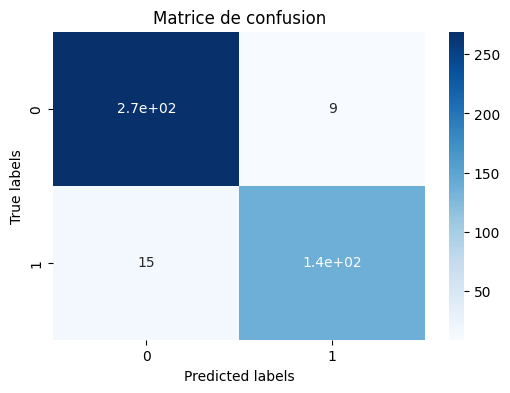

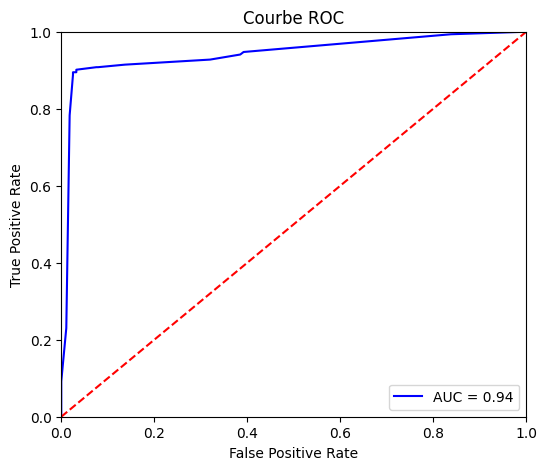

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/09/02 01:19:07 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/09/02 01:19:07 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dat

DecisionTreeClassifier Testing complete.
Testing RandomForestClassifier with optimized parameters...
Score métier :0.10
Accuracy score : 0.94
Precision score : 0.94
Recall score : 0.89
F1 score : 0.92
Fbeta score : 0.90
ROC AUC score : 0.94


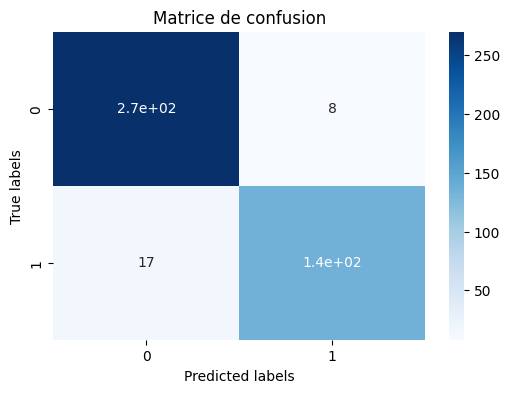

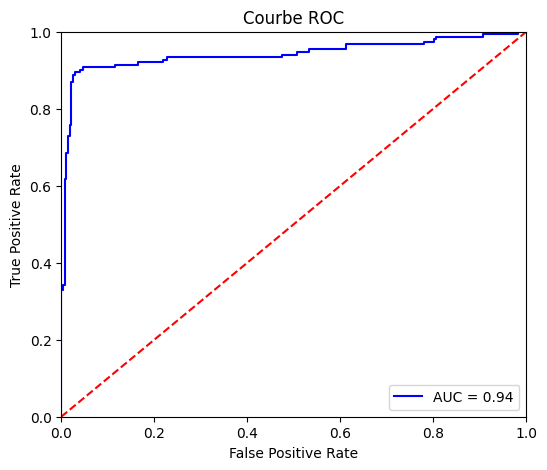

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/09/02 01:19:39 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/09/02 01:19:39 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dat

RandomForestClassifier Testing complete.
Testing XGBClassifier with optimized parameters...
Score métier :0.00
Accuracy score : 0.95
Precision score : 0.93
Recall score : 0.91
F1 score : 0.92
Fbeta score : 0.92
ROC AUC score : 0.94


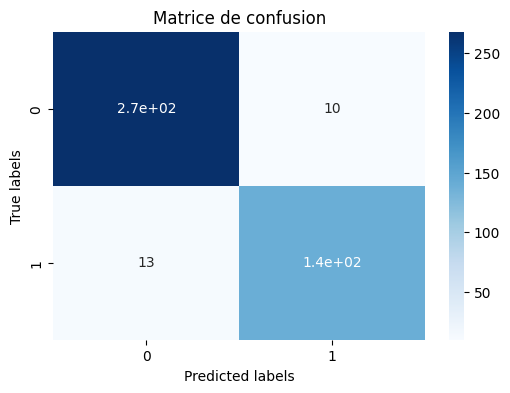

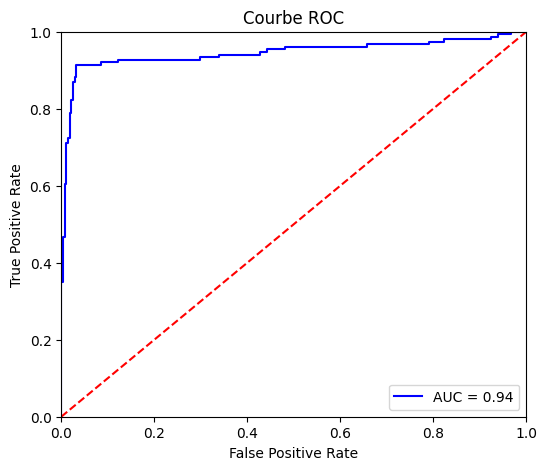

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/09/02 01:23:58 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/09/02 01:23:58 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dat

XGBClassifier Testing complete.
Testing LGBMClassifier with optimized parameters...
[LightGBM] [Info] Number of positive: 1111, number of negative: 1111
[LightGBM] [Info] Total Bins 4393
[LightGBM] [Info] Number of data points in the train set: 2222, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Score métier :0.00
Accuracy score : 0.95
Precision score : 0.93
Recall score : 0.91
F1 score : 0.92
Fbeta score : 0.92
ROC AUC score : 0.94


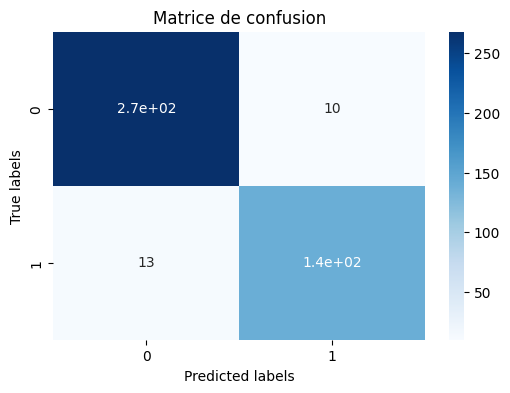

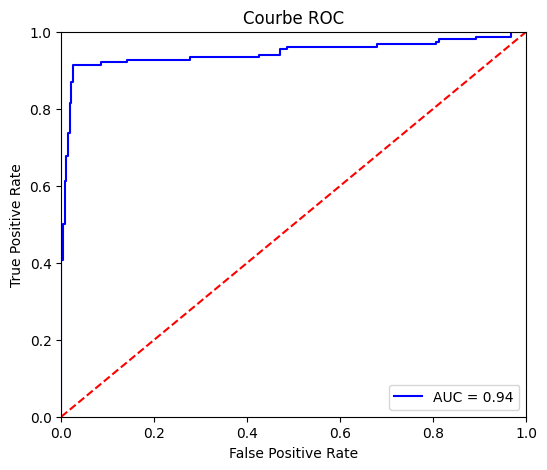

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/09/02 01:24:57 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/09/02 01:24:57 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dat

LGBMClassifier Testing complete.
Testing GaussianNB with optimized parameters...
Score métier :0.58
Accuracy score : 0.81
Precision score : 0.70
Recall score : 0.79
F1 score : 0.74
Fbeta score : 0.77
ROC AUC score : 0.88


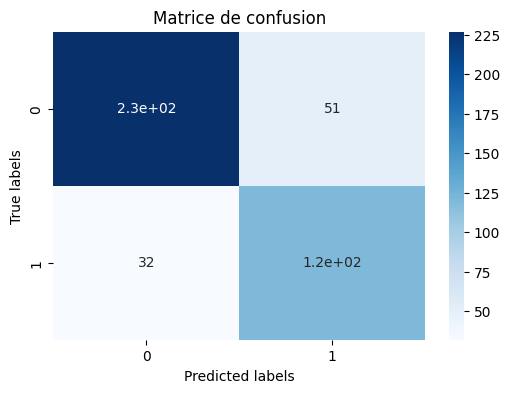

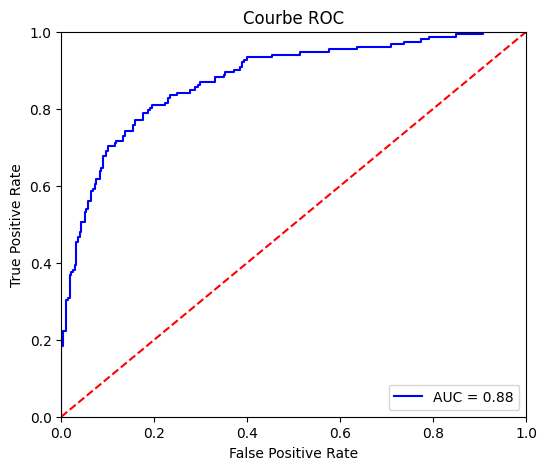

C:\Users\Anais\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlflow\types\utils.py:394: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2024/09/02 01:25:54 INFO mlflow.models.evaluation.default_evaluator: Computing model predictions.
2024/09/02 01:25:54 INFO mlflow.models.evaluation.default_evaluator: The evaluation dataset is inferred as binary dat

GaussianNB Testing complete.


In [26]:
# Test des modèles optimisés et log dans MLflow
for name, model in optimized_models.items():
    print(f"Testing {name} with optimized parameters...")
    logToMLflow(model, X_train, X_test, y_train, y_test, name=f"Optimized {name}")
    print(f"{name} Testing complete.")

Voici les résultats obtenus sur MlFlow pour chaque modèle après optimisation par GridSearchCV : 

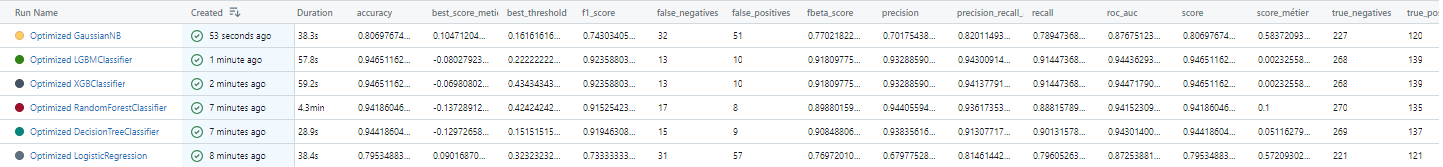


**Performance Globale**

- LGBMClassifier et XGBClassifier obtiennent la meilleure accuracy (0.947) ainsi que les meilleurs scores en F1 Score (0.924) et AUC-ROC (0.943 pour LGBM, 0.942 pour XGB).
- RandomForestClassifier et DecisionTreeClassifier sont également performants, avec des accuracy proches (0.942 et 0.944 respectivement) et des F1 Scores élevés (0.915 et 0.919 respectivement).

**Sensibilité et Précision**

- LGBMClassifier et XGBClassifier montrent une précision élevée (0.933) et un rappel équilibré (0.914), avec une AUC-ROC solide, ce qui indique qu'ils sont très performants pour la détection de la maladie d'Alzheimer tout en maintenant une faible taux de faux positifs.
- DecisionTreeClassifier présente une bonne précision (0.938) et un rappel relativement élevé (0.901), ce qui le rend aussi très compétitif.

**Score Métrique**

- LGBMClassifier et XGBClassifier ont un score métier extrêmement bas (0.002), indiquant qu'ils ont minimisé les faux négatifs, ce qui est crucial pour le diagnostic de la maladie d'Alzheimer.
- RandomForestClassifier et DecisionTreeClassifier ont des scores métiers plus élevés, mais restent compétitifs.

**Temps d'Exécution**

- Gaussian NB et Logistic Regression sont les plus rapides (environ 38-39 secondes), tandis que RandomForestClassifier est le plus long (4.3 minutes). - La performance en termes de précision et de rappel peut justifier un temps d'exécution plus long si le modèle est beaucoup plus performant.

**Conclusion**
- LGBMClassifier et XGBClassifier se distinguent par leurs excellentes performances globales, incluant une accuracy élevée, un F1 Score élevé, et une très bonne AUC-ROC. Leur faible score métier indique qu'ils sont très efficaces pour détecter les cas de la maladie d'Alzheimer tout en minimisant les faux négatifs.
- Pour la prédiction du diagnostic d'Alzheimer, LGBMClassifier et XGBClassifier semblent être les meilleurs choix en raison de leur équilibre entre performance et score métier, avec une préférence potentielle pour LGBMClassifier en raison de son temps d'exécution relativement plus court.

# V- Conclusion 

Ce notebook a pour objectif de développer un modèle de prédiction de la maladie d'Alzheimer en utilisant des techniques de machine learning. 
- Les données ont été nettoyées et prétraitées pour assurer leur qualité et leur cohérence. 
- Une analyse exploratoire des données a été réalisée pour comprendre les distributions et les relations entre les variables. 
- Plusieurs modèles de machine learning ont été entraînés et évalués.
- MLflow a été intégré pour suivre les expériences. Cette approche a facilité la comparaison des performances et la gestion des résultats.

Les modèles **LGBMClassifier** et **XGBClassifier** émergent comme les meilleurs choix pour la prédiction de la maladie d'Alzheimer, grâce à leur excellent équilibre entre précision, rappel, et score métier, avec une préférence potentielle pour **LGBMClassifier** en raison de son temps d'exécution plus court. 

Les modèles **DecisionTreeClassifier** et **RandomForestClassifier** offrent également de bonnes performances, mais avec un score métier légèrement moins favorable. Les modèles **Gaussian NB** et **Logistic Regression**, bien qu'efficaces en termes de rapidité, sont moins performants en termes de précision et de rappel.

Les prochaines étapes pourraient inclure l'optimisation des hyperparamètres, l'enrichissement des données, et la validation externe pour confirmer la robustesse des modèles dans différents contextes cliniques.

Nous encourageons toute personne intéressée à contribuer à l'amélioration de ce projet. Merci d'avoir suivi ce projet !voir exploré ce notebook !
